In [2]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

# Loading data

In [3]:
# Load train and test datasets
train_data = pd.read_csv('../input/til2020/TIL_NLP_train_dataset.csv', index_col = "id")
test_data = pd.read_csv('../input/til2020/TIL_NLP_test_dataset.csv', index_col = "id")

train_data.tail()

,word_representation,outwear,top,trousers,women dresses,women skirts
id,,,,,,
7375,w373517 w350483 w37419 w162965 w286461 w35248 ...,0,1,1,0,0
7376,w261297 w162756 w283853 w500021 w256905 w22079...,1,1,0,0,0
7377,w58536 w182664 w317736 w261297 w91800 w314686 ...,1,0,1,0,0
7378,w194870 w122953 w256905 w66217 w207614 w34893 ...,1,1,0,0,0
7379,w194870 w122953 w66217 w207614 w34893 w56481 w...,1,0,1,0,0


In [34]:
# Load given word embeddings
with open('../input/til2020/word_embeddings.pkl', 'rb') as f:
    embeddings = pickle.load(f)

# Some preprocessing

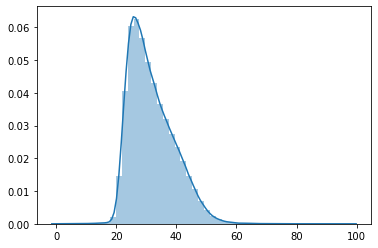

In [5]:
# Get vector magnitudes (rough estimate of how common the word is; lower magnitude means more common)
magnitudes = {}
for key, value in embeddings.items(): 
    magnitudes[key] = np.linalg.norm(value, ord=1)
    
# Plot a histogram
sns.distplot(list(magnitudes.values()))

In [6]:
# Converting input sentences to word vector arrays
X_train = []
for i in train_data['word_representation']:
    sentence_embed = []
    for word in i.strip().split():
        # Ignore words not in the embeddings list
        try:
            sentence_embed.append(embeddings[word])
        except KeyError:
            pass
    # Padding with zeros
    while len(sentence_embed) < 365:
        sentence_embed.append(np.zeros(100))
    X_train.append(np.array(sentence_embed, dtype=np.float32))

X_train = np.array(X_train, dtype=np.float32)

In [7]:
# Same thing, for test dataset
X_test = []
for i in test_data['word_representation']:
    sentence_embed = []
    for word in i.strip().split():
        # Ignore words not in the embeddings list
        try:
            sentence_embed.append(embeddings[word])
        except KeyError:
            pass
    # Padding with zeros
    while len(sentence_embed) < 365:
        sentence_embed.append(np.zeros(100))
    X_test.append(np.array(sentence_embed, dtype=np.float32))

X_test = np.array(X_test, dtype=np.float32)

In [8]:
# Formatting targets
y_train = np.array(train_data.loc[:, "outwear":"women skirts"])

# The actual model

In [9]:
model = keras.Sequential([
    keras.layers.Masking(),
    keras.layers.Bidirectional(keras.layers.SimpleRNN(384)),
    keras.layers.Dense(384, activation = "relu"),
    keras.layers.Dense(5)
])

In [10]:
model.compile(loss = keras.losses.BinaryCrossentropy(from_logits = True),
             optimizer = 'adam',
             metrics = ['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
231/231 [==============================] - 196s 850ms/step - loss: 0.4242 - accuracy: 0.4863
Epoch 2/20
231/231 [==============================] - 193s 837ms/step - loss: 0.2757 - accuracy: 0.5343
Epoch 3/20
231/231 [==============================] - 188s 813ms/step - loss: 0.1971 - accuracy: 0.5068
Epoch 4/20
231/231 [==============================] - 187s 811ms/step - loss: 0.1566 - accuracy: 0.5405
Epoch 5/20
231/231 [==============================] - 187s 809ms/step - loss: 0.1171 - accuracy: 0.5472
Epoch 6/20
231/231 [==============================] - 187s 809ms/step - loss: 0.0993 - accuracy: 0.5459
Epoch 7/20
231/231 [==============================] - 188s 813ms/step - loss: 0.0850 - accuracy: 0.5491
Epoch 8/20
231/231 [==============================] - 187s 811ms/step - loss: 0.0759 - accuracy: 0.5629
Epoch 9/20
231/231 [==============================] - 185s 802ms/step - loss: 0.0865 - accuracy: 0.5560
Epoch 10/20
231/231 [==============================] - 185s 803m

# Prediction

In [27]:
y_pred = model.predict(X_test)
# Convert labels to 0 or 1
preds_labels = [[1 if x > 0.5 else 0 for idx,x in enumerate(i) ] for i in y_pred]
preds_labels

[[0, 1, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [0, 1, 1, 0, 0],
 [0, 1, 1, 0, 0],
 [0, 0, 1, 1, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [0, 0, 0, 1, 1],
 [1, 1, 0, 0, 0],
 [1, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 1, 0],
 [0, 1, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 1, 0, 0, 0],
 [0, 1, 1, 0, 0],
 [1, 1, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 1, 0, 0],
 [0, 1, 0, 0, 1],
 [1, 0, 1, 0, 0],
 [0, 0, 0, 1, 1],
 [1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1],
 [1, 0, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 1],
 [0, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [1, 0, 1, 0, 0],
 [0, 1, 0, 0, 1],
 [0, 1, 0, 1, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [1, 0, 0, 1, 0],
 [0, 0, 1, 0, 1],
 [1, 0, 0, 1, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [1, 1, 1, 0, 0],
 [1, 1, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 1, 1, 0, 0],
 [0, 0, 1, 0, 0],
 [1, 0, 0,

In [33]:
pred_df = pd.DataFrame(preds_labels, columns = ['outwear', 'top', 'trousers', 'women dresses', 'women skirts'])
pred_df.to_csv('output.csv', index=True, index_label = 'id')